In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import copy
import plotly.express as px
import pandas as pd

#Multivariable linear regression

y ... real data point by equation y = 2+3x+x^2, where x is generate univariate randomly in interval [-10,10]

predict_y_mul ... predicting y data points by Multivariate linear regression


y_eps ... yk = y + eps with eps ~ N(0,10)

In [2]:
n_size = 1000
x = np.random.uniform(-10,10, size= n_size)
y = 2 + 3*x +x**2
### Change epsilon ~ N(0,10)
eps = np.random.normal(loc=0.0, scale=10, size= n_size)
y_eps = y + eps
x2 = copy.deepcopy(x)
x2 = x2**2
x = list(zip(x,x2))

In [3]:
def beta(x,y):
    x_new = copy.deepcopy(x)
    listx =[]
    for item in x_new:
        x0 = list(item)
        listx.append(x0)
    for item in listx:
        item.insert(0,1)
    x = np.array(listx)
    ### Ma tran chuyen vi Xt
    xt = x.T
    ### XtX, XtY
    XtX = np.matmul(xt, x)
    XtY = np.matmul(xt, y)
    ### Inverse XtX
    XtX_inv = np.linalg.inv(XtX)
    beta = np.matmul(XtX_inv, XtY)
    print('Phuong trinh co dang: ', beta[0] ,'+', beta[1], '*x', '+', beta[2], '*x^2')
    return beta

In [4]:
beta = beta(x,y_eps)

Phuong trinh co dang:  2.4182321752624922 + 2.9448909466209505 *x + 0.984113902241773 *x^2


In [5]:
X1 = []
X2 = []
for item in range(len(x)):
    X1.append(x[item][0])
    X2.append(x[item][1])
X1 = np.array(X1)
X2 = np.array(X2)
predict_y_mul = beta[0] +beta[1]*X1+ beta[2]*X2

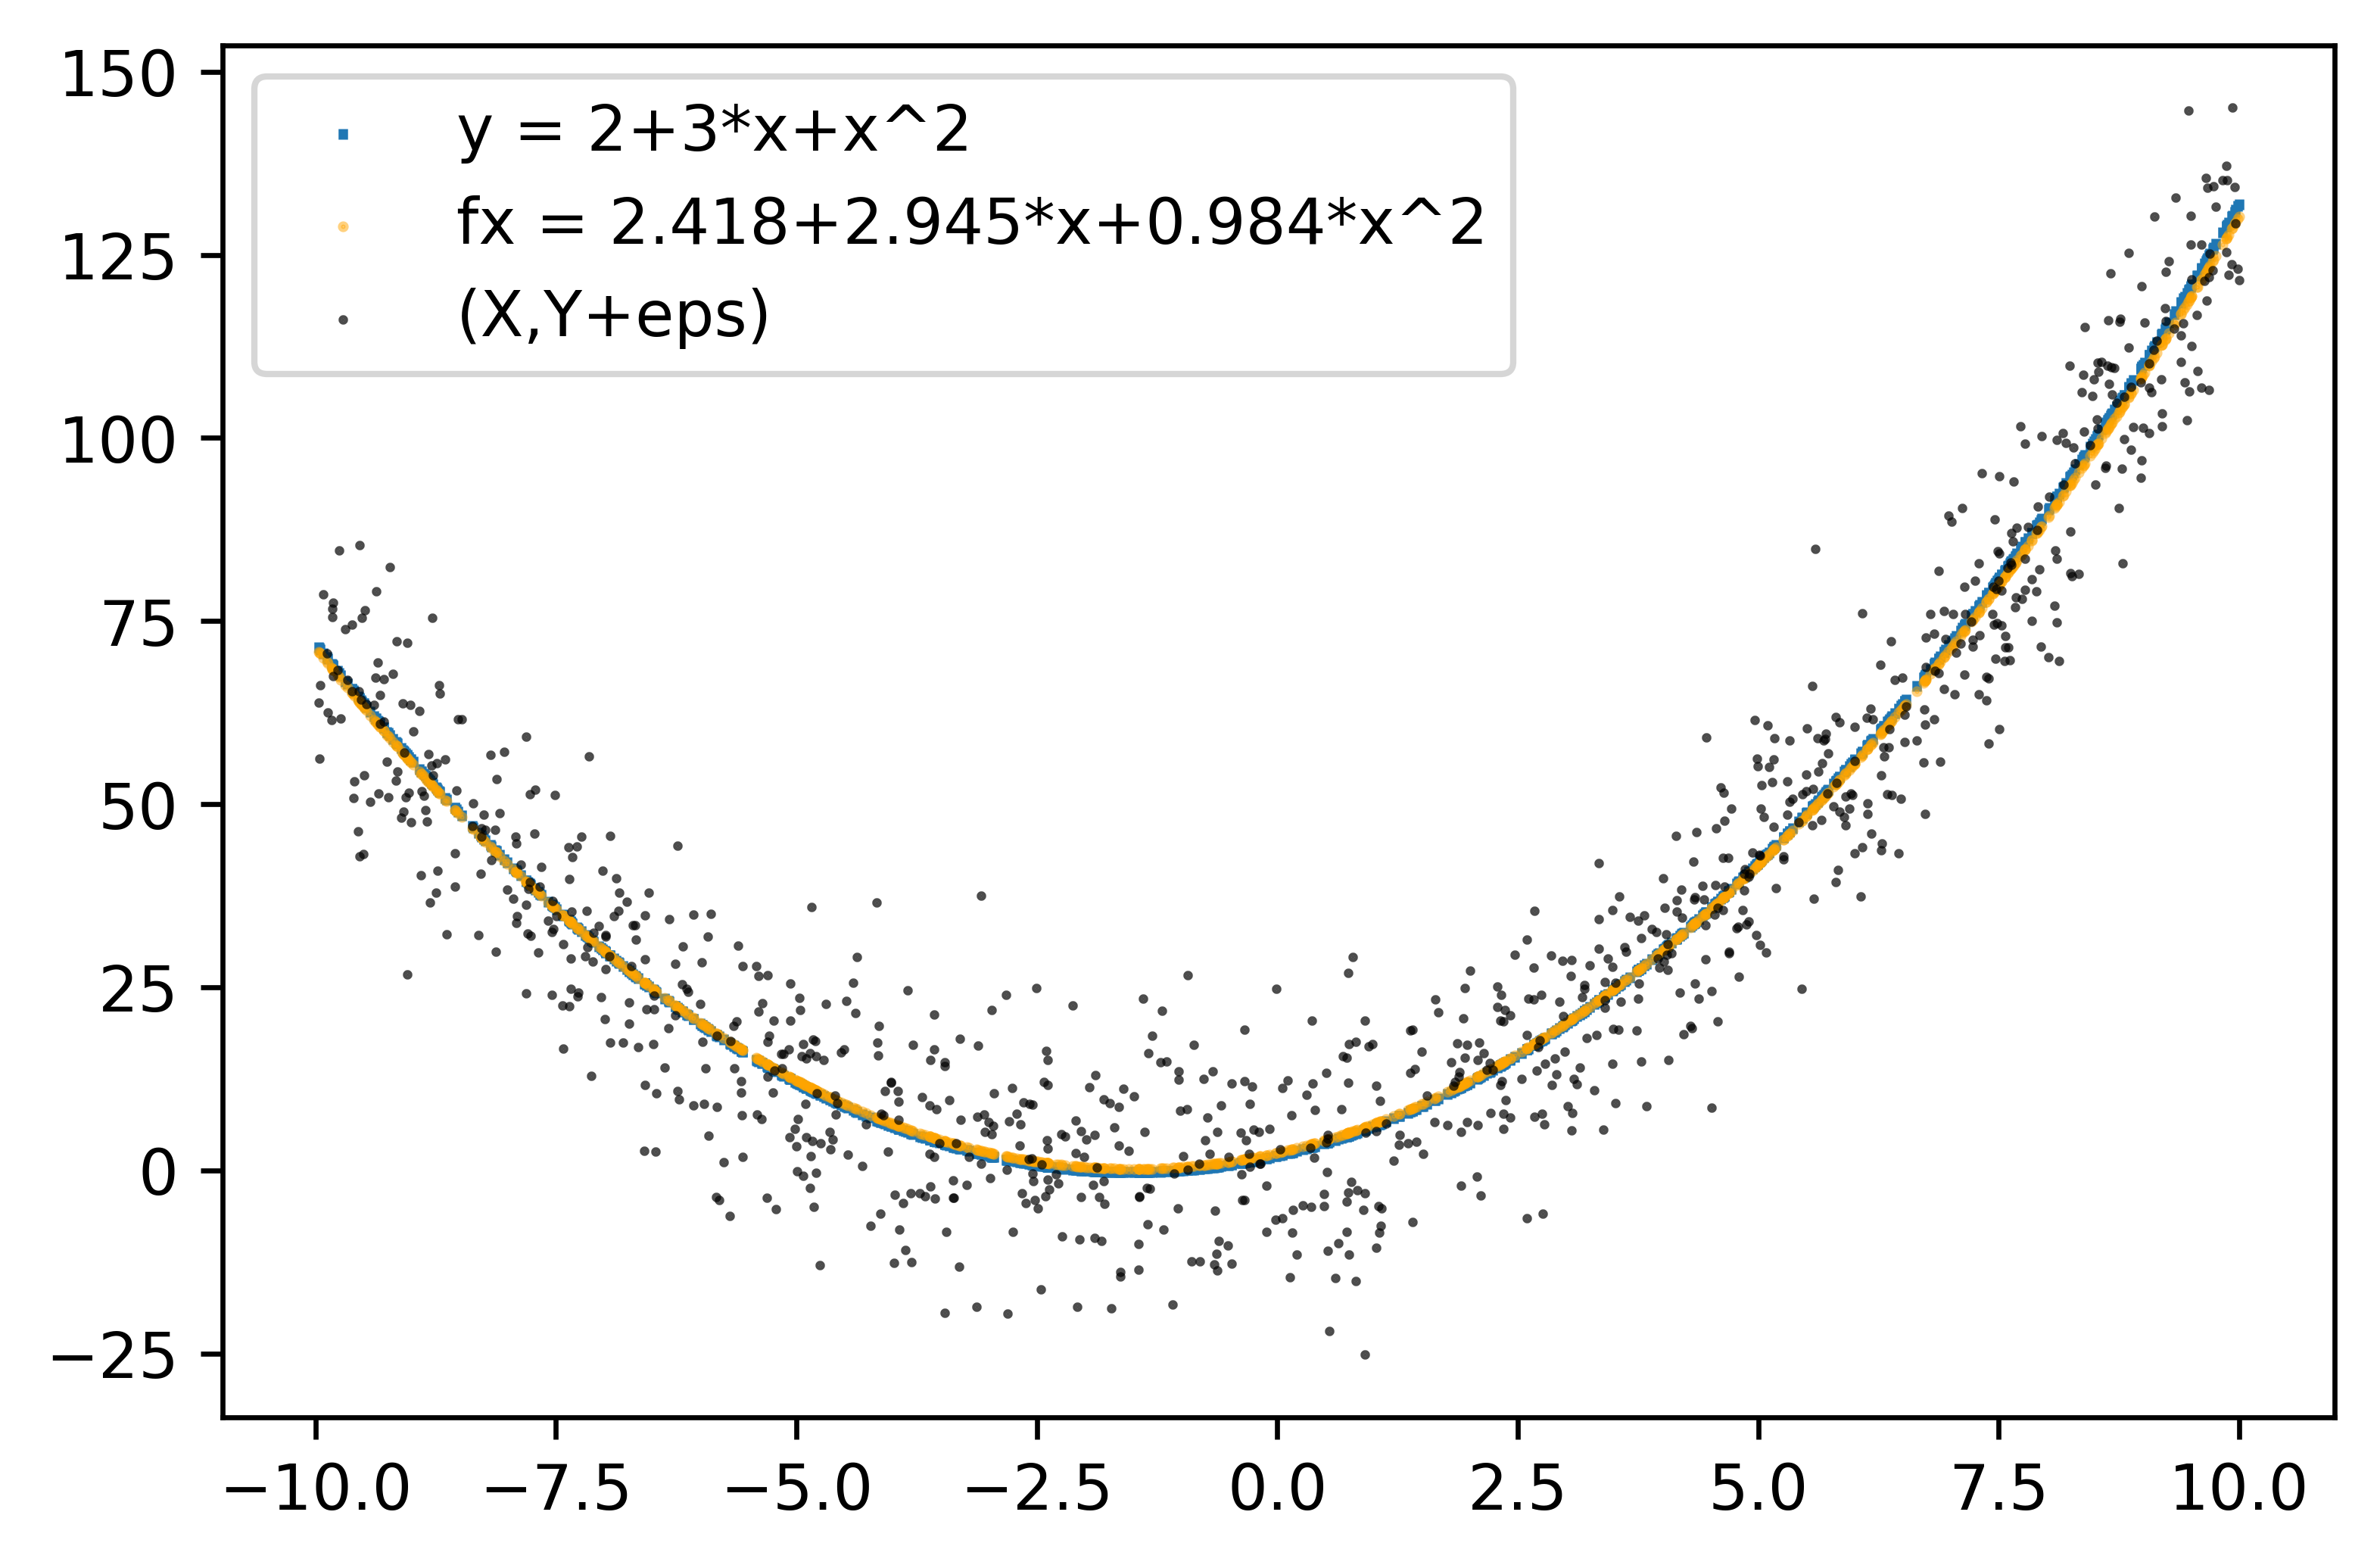

In [6]:
plt.rcParams["figure.dpi"] = 600
fig = plt.figure()
ax = plt.axes()
ax.scatter(X1, y, label = 'y = 2+3*x+x^2', marker = '|', s = 3)
ax.scatter(X1, predict_y_mul, alpha = 0.5, label = 'fx = {}+{}*x+{}*x^2'.format(round(beta[0],3), round(beta[1],3), round(beta[2],3)), marker = '.', s = 2, color = 'orange')
ax.scatter(X1, y_eps, color = 'black', alpha = 0.7, marker ='.', label = '(X,Y+eps)', s =1)
plt.legend()

In [7]:
## Try to display it on 3D.
df = pd.DataFrame(dict(
    X=X1, 
    Y=X2, 
    Z=y,
    Z2 = predict_y_mul,
    Z3 = y_eps
))
fig = px.scatter_3d(df, x='X', y='Y', z='Z', title = 'y = 2+3*x+x^2', opacity =0.2)
fig.add_scatter3d(x=df['X'], y=df['Y'], z=df['Z2'], name ='fx = {}+{}*x+{}*x^2'.format(round(beta[0],3), round(beta[1],3), round(beta[2],3)),mode='markers', marker = dict(size = 3, color='red'))
fig.add_scatter3d(x=df['X'], y=df['Y'], z=df['Z3'], name = '(X,Y+eps)', mode = 'markers', marker = dict(size = 3, color='black'))
fig.show()

In [8]:
## Tinh Sai số :)
ss1 = np.sqrt(1/n_size * np.sum(np.power(predict_y_mul-y, 2)))
ss1

0.6040029494024758

#Nadaraya Watson Method

y2 ... real data point by equation y = 2+3x+x^2, where x belongs to the interval of [-10,10])

predict_y_nada ... by Nadaraya Watson

y_eps2 ... yk = y2 + eps2 with eps ~ N(0,10) 


In [9]:
# Definition of kernel function
def chu_nhat(x):
  k = 0.5 if np.abs(x) < 1 else 0
  return k

def tam_giac(x):
  k = 1 - np.abs(x) if np.abs(x) < 1 else 0
  return k

def parabolic(x):
  k = (3/4) * (1- pow(x,2)) if np.abs(x)<1 else 0
  return k

def haitrongso(x):
  sotam = 1- pow(x,2)
  k = (15/16)* pow(sotam,2) if np.abs(x) < 1 else 0
  return k

def gauss(x):
  k = 1/(np.sqrt(2*np.pi)) * pow(np.e, -(x**2)/2)
  return k

def sine(x):
  k = 0.5* pow(np.e, -np.abs(x)/np.sqrt(2))* np.sin(np.abs(x)/np.sqrt(2) + np.pi/4)
  return k

In [10]:
def x_kernel(xi, x0, h0):
  x = (xi - x0)/h0
  return x

In [11]:
## Tao luoi 
x2 = np.linspace(-10,10, num = n_size)
y2 = 2+ 3*x2 + x2**2
eps2 = np.random.normal(loc=0.0, scale=10, size= n_size)
y_eps2 = y2 + eps2

In [12]:
def f_nada(xi, yi, h0, kernel, nsize):
  fi = []
  ii = 0
  while ii < n_size:
    tichyk = []
    kq_kernel=[]
    x0 = np.random.normal(loc=0.0, scale=1.0, size=500)
    y = y2[ii]
    x = x_kernel(xi[ii],x0, h0)
    for i in range(len(x)):
      #k= gauss(x[i])
      if kernel == 1:
        k = chu_nhat(x[i])
      elif kernel == 2:
        k = tam_giac(x[i])
      elif kernel == 3:
        k = parabolic(x[i])
      elif kernel == 4:
        k = haitrongso(x[i])
      elif kernel == 5:
        k = gauss(x[i])
      elif kernel == 6:
        k = sine(x[i])
      else:
        print("Error")
      tich = y *k
      tichyk.append(tich)
      kq_kernel.append(k)
    f_tuso = np.sum(tichyk)
    f_mauso = np.sum(kq_kernel)
    kq = f_tuso/f_mauso
    fi.append(kq)
    ii += 1
  return fi

In [13]:
predict_y_nada = f_nada(xi =x2, yi = y_eps2, h0= 1, kernel= 5, nsize= n_size)

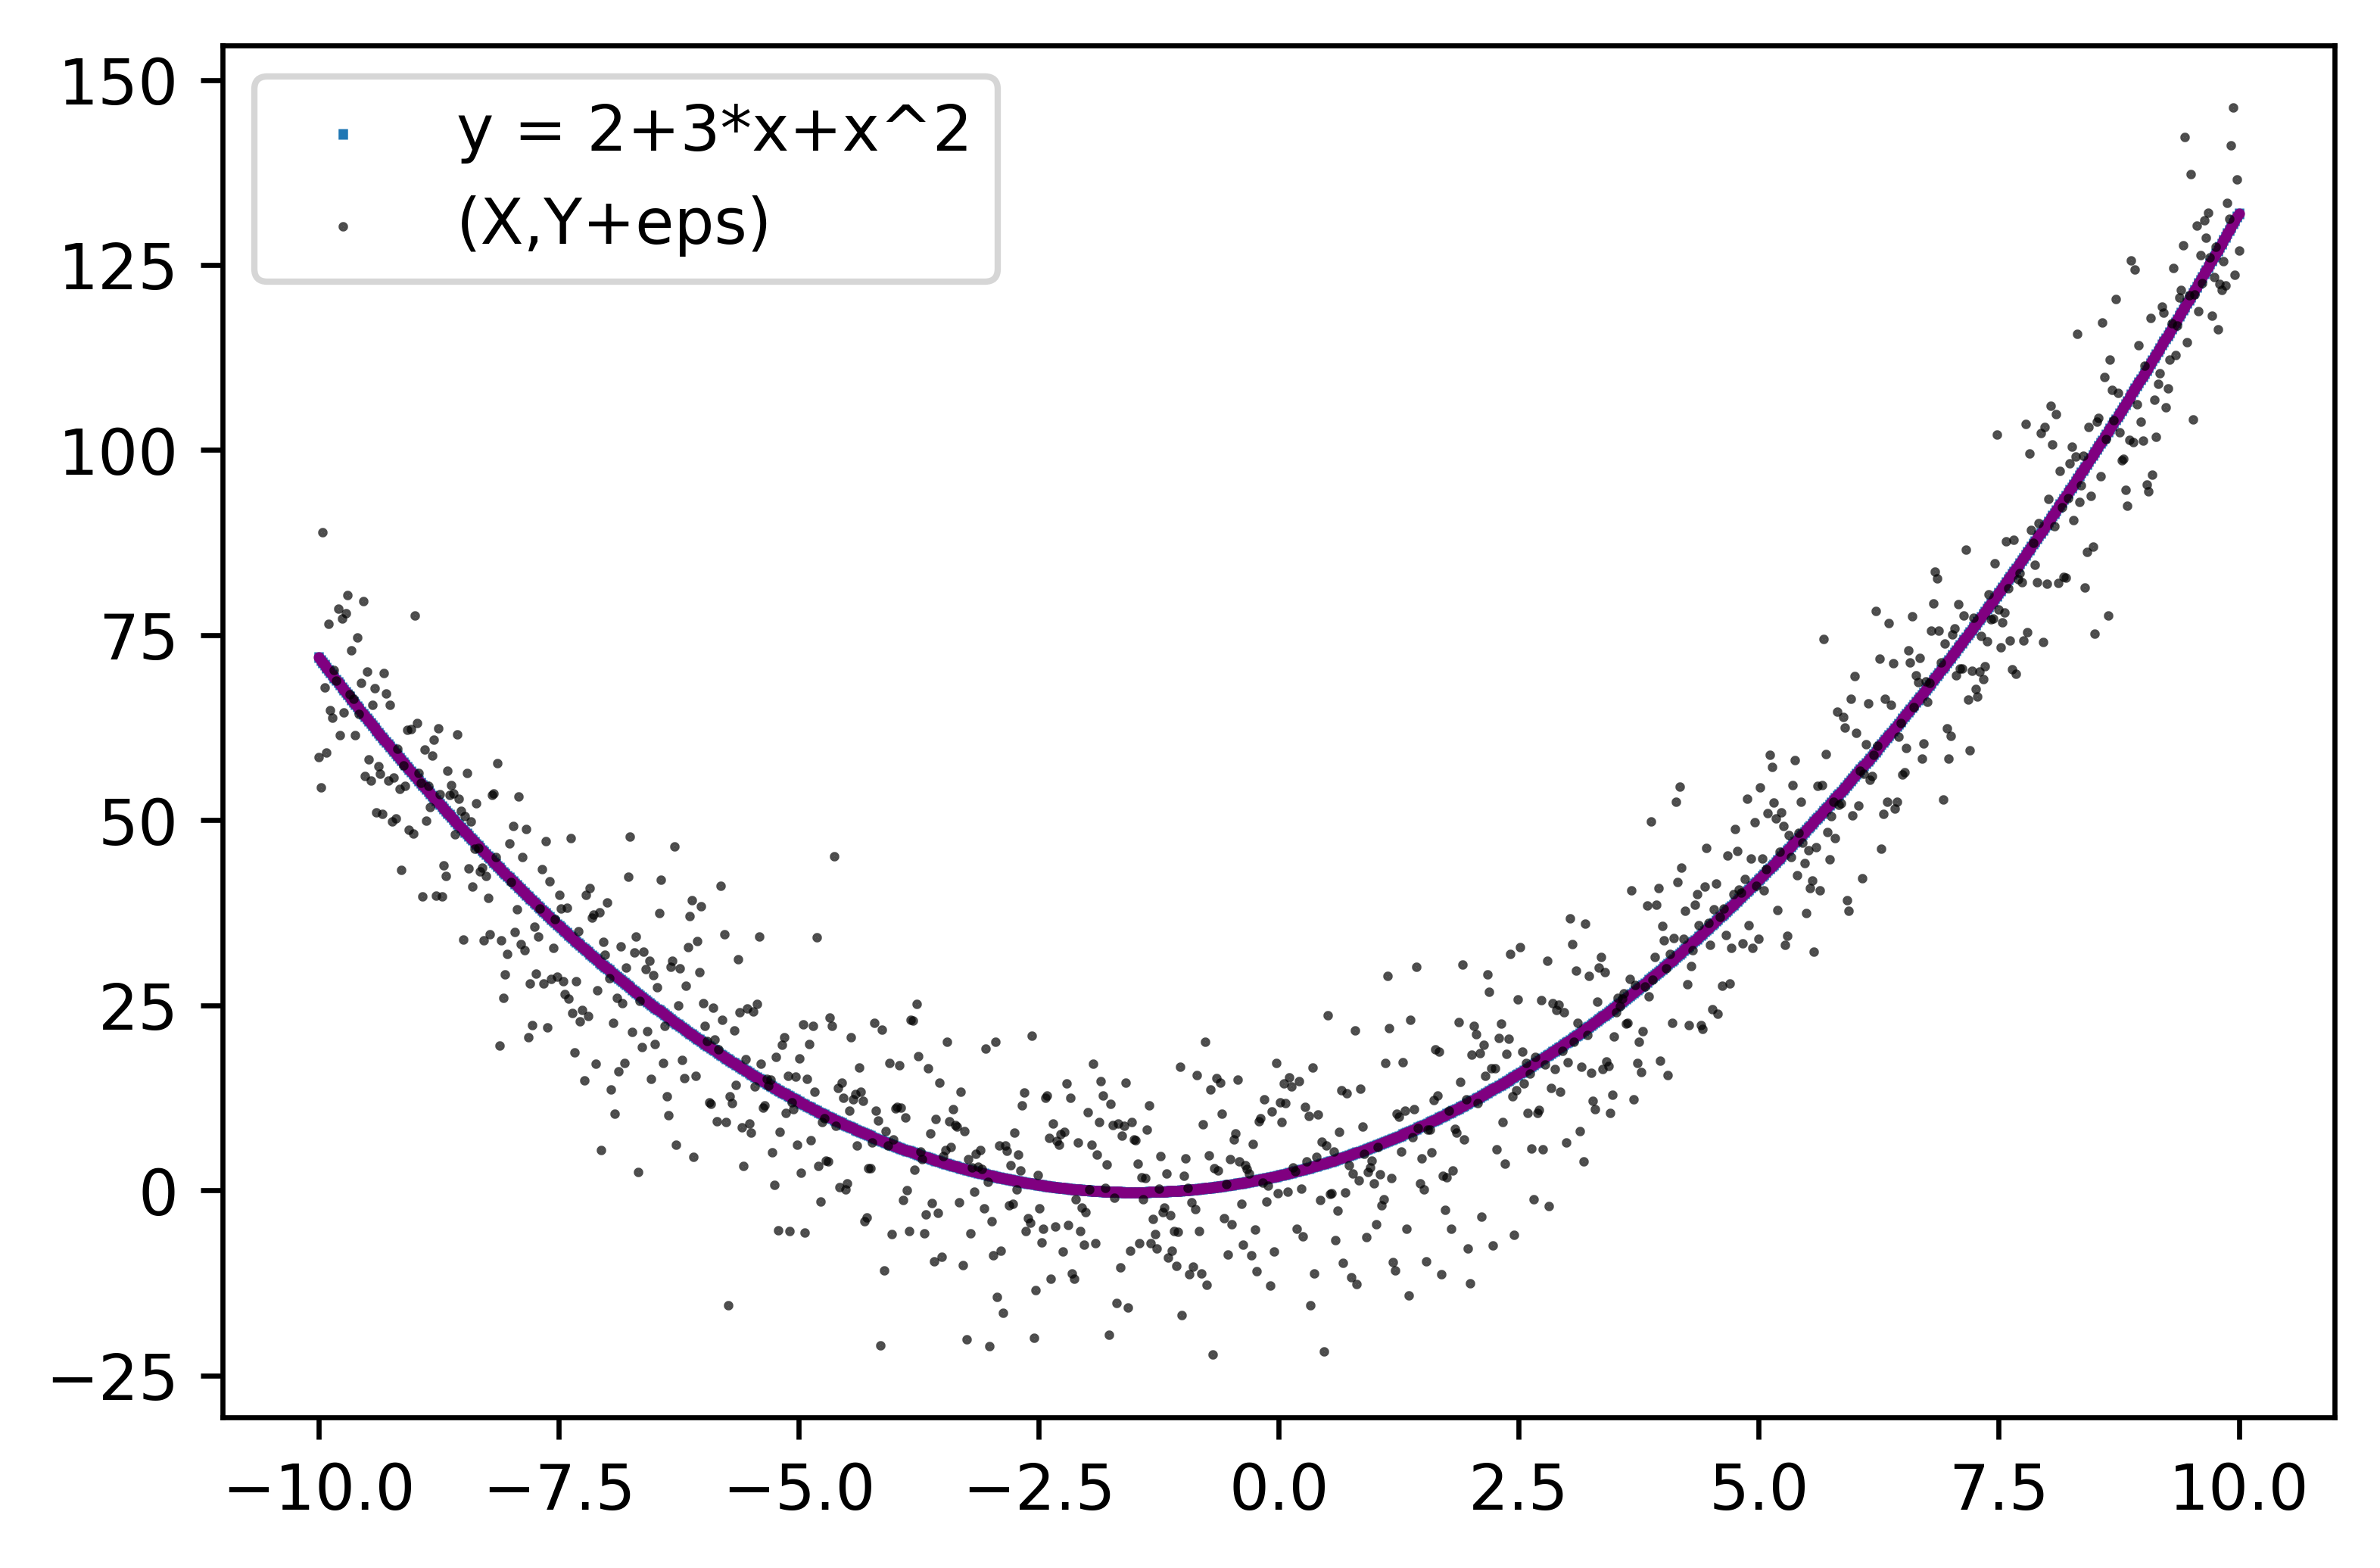

In [14]:
plt.rcParams["figure.dpi"] = 600
fig = plt.figure()
ax = plt.axes()
ax.scatter(x2, y2, label = 'y = 2+3*x+x^2', marker = '|', s = 3)
ax.scatter(x2, predict_y_nada, marker = '.', color = 'purple', s = 2)
ax.scatter(x2, y_eps2, color = 'black', alpha = 0.7, marker ='.', label = '(X,Y+eps)', s = 1)
plt.legend()

In [15]:
## Try to display it on 3D.
df = pd.DataFrame(dict(
    X=x2, 
    Y=x2**2, 
    Z=y2,
    Z2 = predict_y_nada,
    Z3 = y_eps2
))
fig = px.scatter_3d(df, x='X', y='Y', z='Z', title = 'y = 2+3*x+x^2', opacity =0.2)
fig.add_scatter3d(x=df['X'], y=df['Y'], z=df['Z2'], name ='fx = {}+{}*x+{}*x^2'.format(round(beta[0],3), round(beta[1],3), round(beta[2],3)),mode='markers', marker = dict(size = 3, color='red'))
fig.add_scatter3d(x=df['X'], y=df['Y'], z=df['Z3'], name = '(X2,Y2+eps2)', mode = 'markers', marker = dict(size = 3, color='black'))
fig.show()

In [16]:
## Tinh Sai số :)
ss2 = np.sqrt(1/n_size * np.sum(np.power(predict_y_nada-y2, 2)))
ss2

9.457206551128104e-15

#From FOURIER
y3 ... real data point by equation y = 2+3x+x^2, where x belongs to the interval of [0,1])

predict_y_fourier ... by fourier


In [17]:
n_size = 1000
x3 = np.linspace(0,1, num = n_size)
y3 = 2+ 3*x3 + x3**2

In [18]:
def phi(x):
  phi_Xj = []
  for i in range(len(x)):
    if i == 0:
      phi = 1
    elif i %2 == 0:
      #Nếu số thứ tự i chia hết cho 2 thì đây là phần tử số lẻ. x[0] : index 1; x[1] : index 2.
      phi = np.sqrt(2)* np.sin((i-1)*np.pi*x[i])
    else:
      #So thứ tự chẵn
      phi = np.sqrt(2)* np.cos(i*np.pi*x[i])
    phi_Xj.append(phi)
  return phi_Xj

In [19]:
#Tao bien x ngau nhien
x0 = np.random.normal(loc=0.0, scale=1.0, size= n_size)

In [20]:
W_nj=[]
for k in range(n_size):
  phi_Xj = phi([x3[k]]*1000)
  phi_x = phi([x0[k]]*1000)
  ketqua = 1/n_size * np.dot(phi_Xj, phi_x)
  W_nj.append(ketqua)

fn=[]
for i in range(n_size):
  lst_Wnj = [W_nj[i]] * n_size
  f = np.sum(np.dot(y3[i],lst_Wnj))
  fn.append(f)

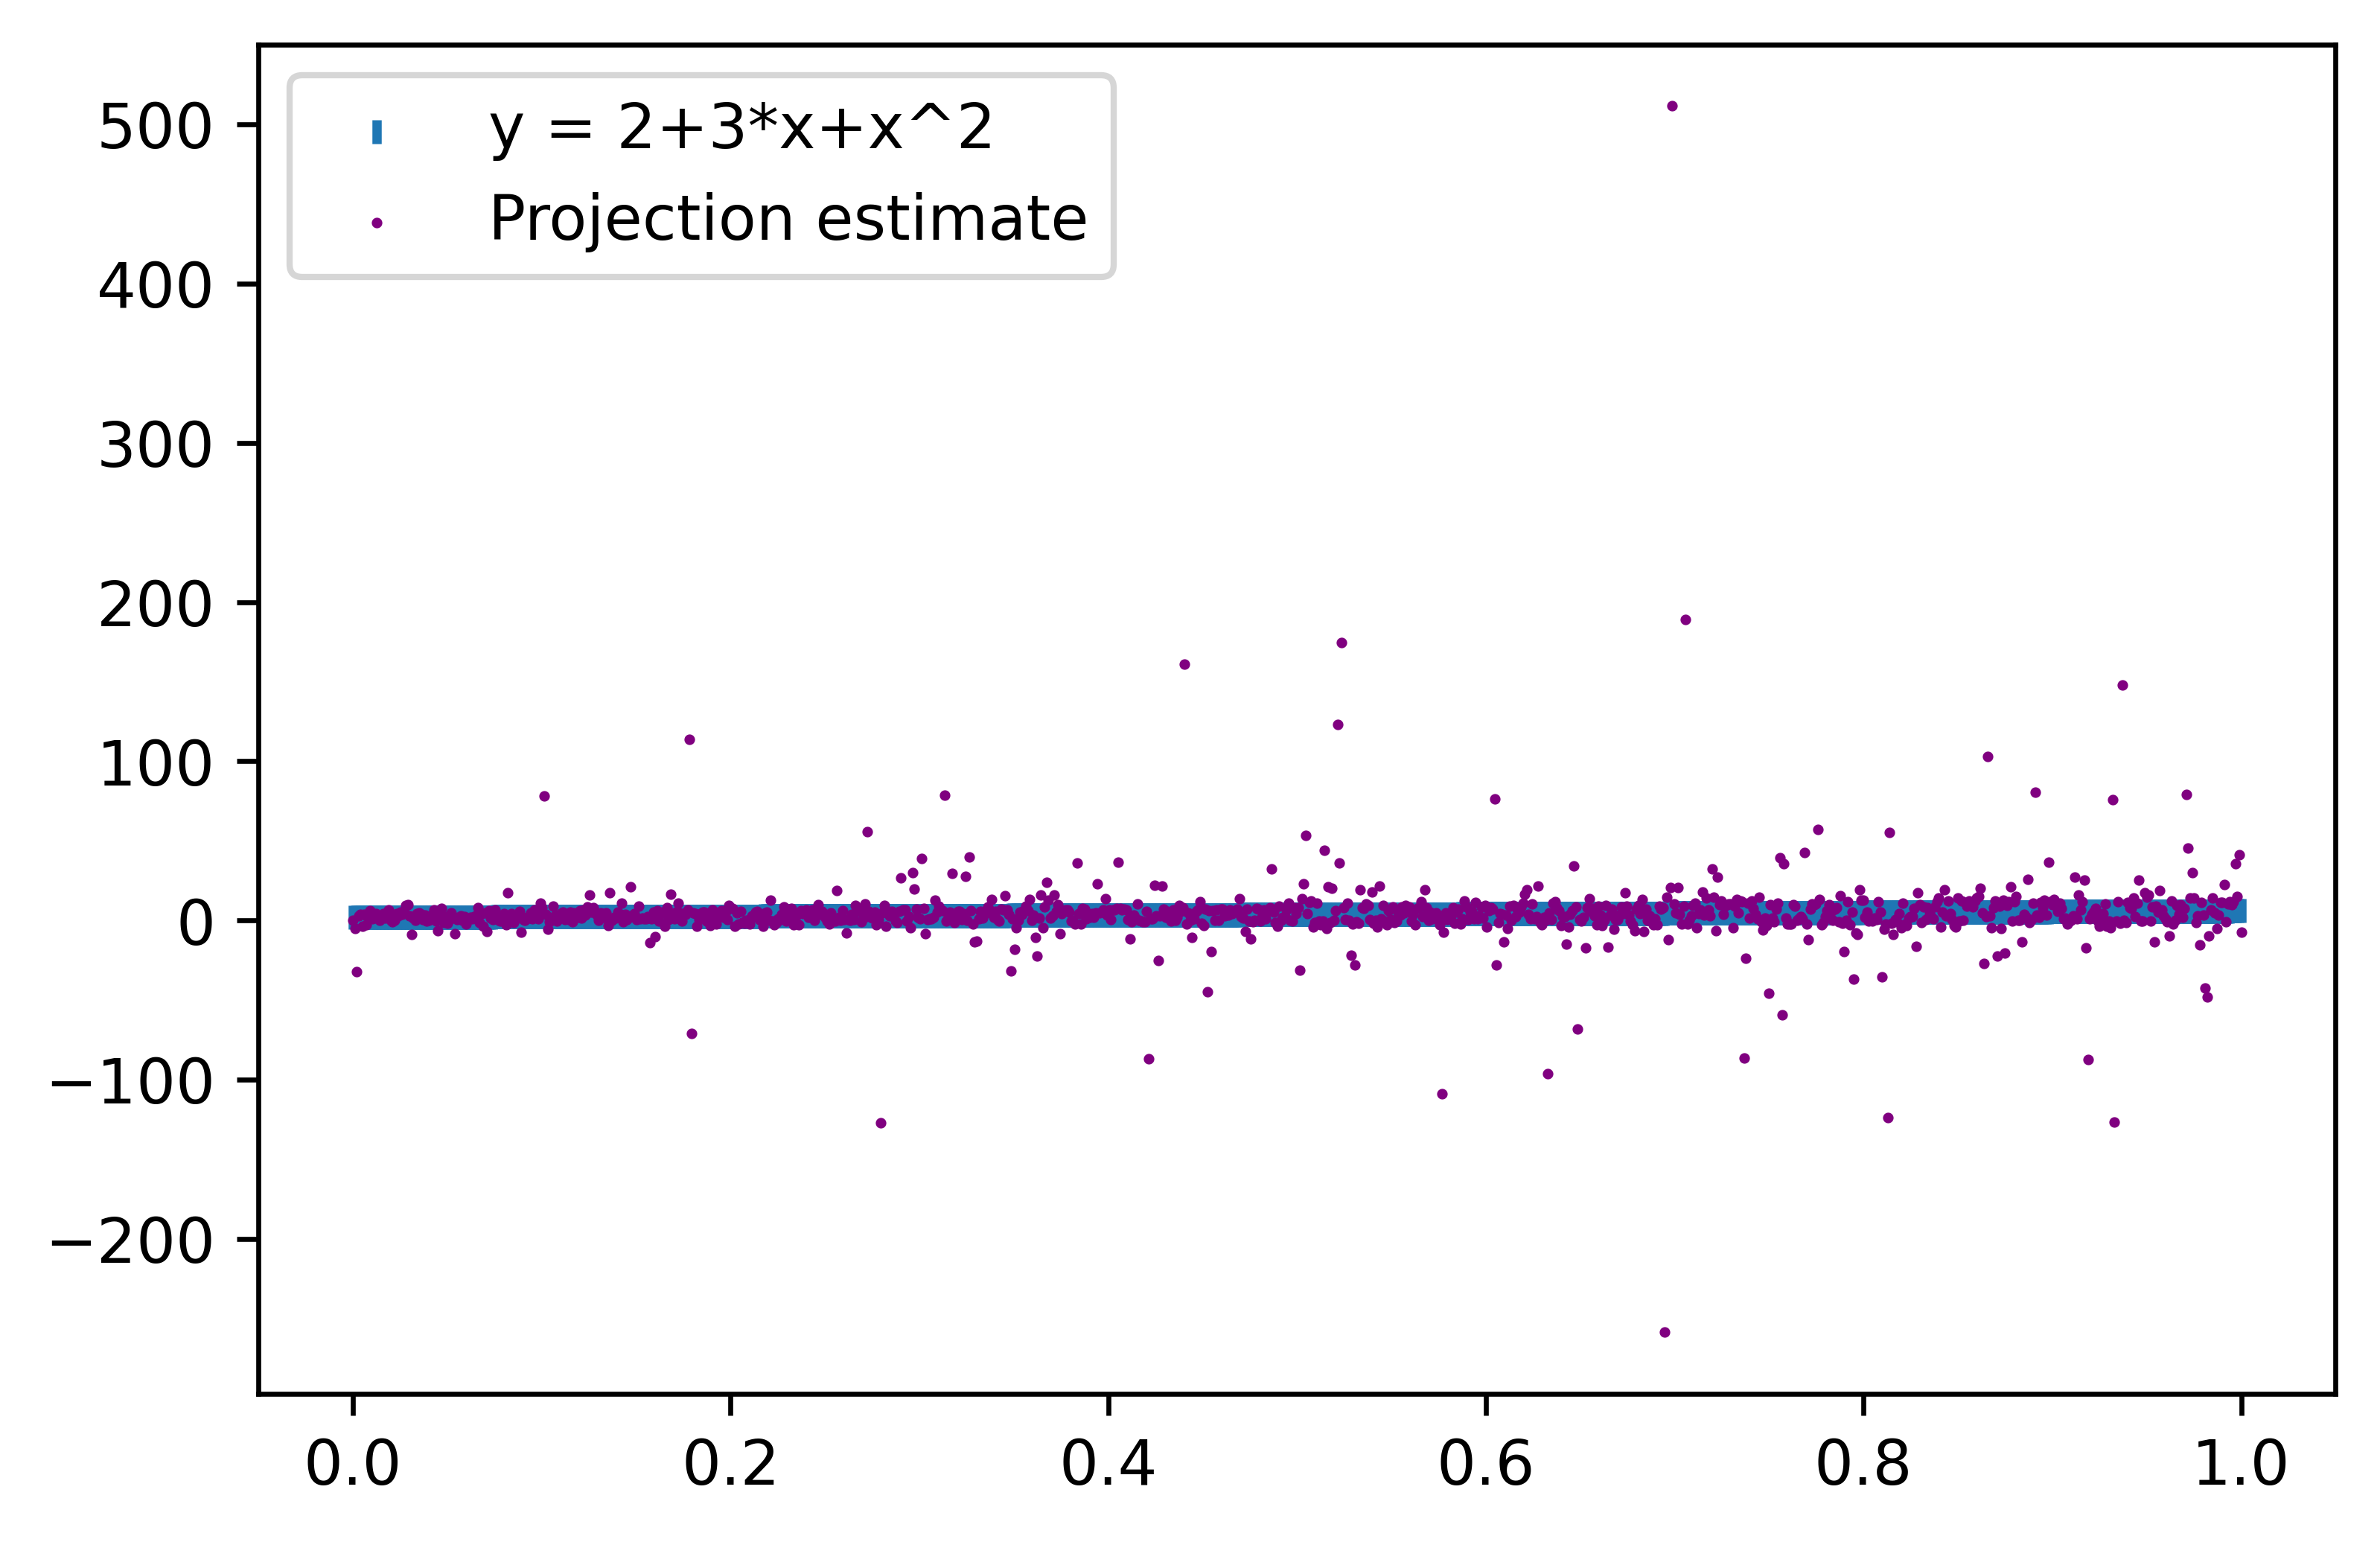

In [21]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x3, y3, label = 'y = 2+3*x+x^2', marker = '|', s=15)
ax.scatter(x3, fn, label = 'Projection estimate', marker = '.', color = 'purple', s = 2)
plt.legend()

In [22]:
## Try to display it on 3D.
df = pd.DataFrame(dict(
    X=x3, 
    Y=x3**2, 
    Z=y3,
    Z2 = fn,
))
fig = px.scatter_3d(df, x='X', y='Y', z='Z', title = 'y = 2+3*x+x^2', opacity =0.2)
fig.add_scatter3d(x=df['X'], y=df['Y'], z=df['Z2'], name = 'projection estimator', mode='markers', marker = dict(size = 5, color='red'))
fig.show()